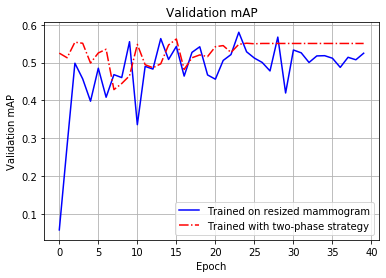

In [5]:
# Patch training results vs. resized training results
# mAP
# ResNet-50 as backbone
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import numpy as np

tensorboard_path_1 = r"D:\Studying\RetinaNet_snapshots\12_06_2020_no_random_transform\logs"
tensorboard_path_2 = r"D:\Studying\RetinaNet_snapshots\patch_training_resnet50_new\7_3\11_07_2020_patch_resume_7_3_resnet50_new\logs"

ea_1 = event_accumulator.EventAccumulator(tensorboard_path_1)
ea_1.Reload()
ea_2 = event_accumulator.EventAccumulator(tensorboard_path_2)
ea_2.Reload()

# First event object
mAP_1 = ea_1.scalars.Items('mAP')
# Second event object
mAP_2 = ea_2.scalars.Items('mAP')


mAP_1_plot = [j.value for j in mAP_1]

mAP_2_plot = [j.value for j in mAP_2]
# Plot validation mAP
plt.figure(2)
steps = [j.step for j in mAP_1]
p1, = plt.plot(steps, mAP_1_plot, color = 'b')
p2, = plt.plot(steps, mAP_2_plot, color = 'r', linestyle = '-.')


plt.legend(handles=[p1,p2],labels=['Trained on resized mammogram', 'Trained with two-phase strategy'],loc='best')
plt.xlabel('Epoch')
plt.ylabel('Validation mAP')
plt.title('Validation mAP')
plt.grid()
plt.savefig('comparison_patch_training_and_resized.pdf', dpi=500, bbox_inches = 'tight')
plt.show()